<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CvAssignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sum of Squared Differences (SSD): 1329630
Sum of Robust Differences (SRD): 52385.46148640698
Sum of Absolute Differences (SAD): 1918740


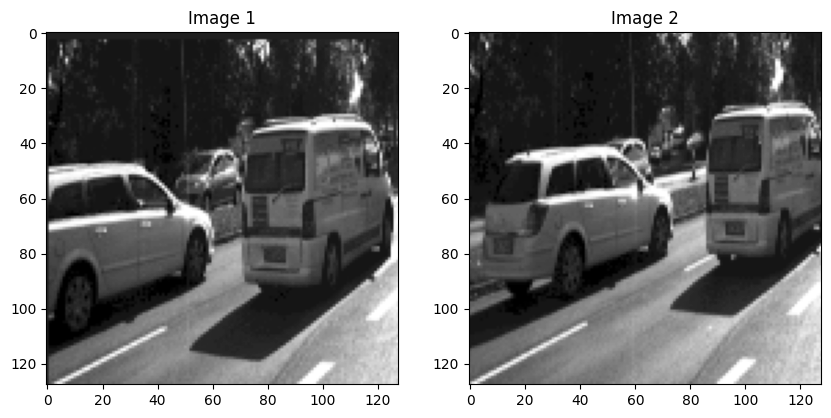

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the algorithms
def sum_of_squared_differences(img1, img2):
    return np.sum((img1 - img2) ** 2)

import numpy as np

def sum_of_robust_differences(img1, img2):
    # Ensure the inputs are numpy arrays
    img1 = np.asarray(img1)
    img2 = np.asarray(img2)

    # Check if shapes are compatible
    if img1.shape != img2.shape:
        raise ValueError("Input images must have the same dimensions")

    # Calculate the absolute differences
    abs_diff = np.abs(img1 - img2)

    # To prevent log(0) which leads to -inf, we can handle the scenario.
    # A small epsilon value can be added; alternatively, filter out zero differences.
    epsilon = 1e-10  # Very small value to avoid log(0)
    robust_diff = np.log(1 + abs_diff + epsilon)  # Add epsilon to avoid log(0)

    return np.sum(robust_diff)

# Example usage
# img1 and img2 should be numpy arrays of the same shape, e.g., images.
def sum_of_absolute_differences(img1, img2):
    return np.sum(np.abs(img1 - img2))

# Load two images to compare
def load_and_preprocess_image(image_path, size=(128, 128)):
    # Read the image
    # Check if the file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image loading was successful
    if img is None:
        raise ValueError(f"Could not load image: {image_path}")
    # Resize the image
    img_resized = cv2.resize(img, size)
    return img_resized

# Example usage
if __name__ == "__main__":
    # Path to images
    img1_path = 'image-1.png'  # Replace with your image path
    img2_path = 'image-2.png'  # Replace with your image path

    # Load images
    img1 = load_and_preprocess_image(img1_path)
    img2 = load_and_preprocess_image(img2_path)

    # Ensure images have the same dimensions
    assert img1.shape == img2.shape, "Images must have the same dimensions!"

    # Compute the metrics
    ssd = sum_of_squared_differences(img1, img2)
    srd = sum_of_robust_differences(img1, img2)
    sad = sum_of_absolute_differences(img1, img2)

    # Print results
    print(f"Sum of Squared Differences (SSD): {ssd}")
    print(f"Sum of Robust Differences (SRD): {srd}")
    print(f"Sum of Absolute Differences (SAD): {sad}")

    # Display the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Image 1")
    plt.imshow(img1, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Image 2")
    plt.imshow(img2, cmap='gray')
    plt.show()

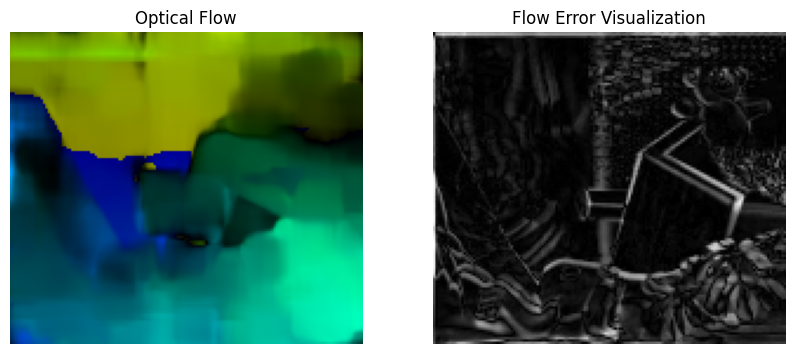

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (ensure they are in grayscale)
img1 = cv2.imread('/content/image1.png', cv2.IMREAD_GRAYSCALE)  # First image
img2 = cv2.imread('/content/image2.png', cv2.IMREAD_GRAYSCALE)  # Second image

# Validate image shapes
if img1 is None or img2 is None:
    raise ValueError("One of the images could not be loaded. Check the file paths.")

# Resize img2 to match img1's dimensions
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Now, the images should have the same dimensions dimensions")

# Compute optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Prepare to visualize the flow
h, w = img1.shape
y, x = np.mgrid[0:h, 0:w]
# Calculate magnitude and angle
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Create an HSV image for optical flow visualization
hsv = np.zeros((h, w, 3), dtype=np.float32)

# Normalize the magnitude to [0, 1] for color mapping
magnitude = cv2.normalize(magnitude, None, 0, 1, cv2.NORM_MINMAX)
hsv[..., 0] = angle * 180 / np.pi / 2  # Hue: direction
hsv[..., 1] = 1  # Saturation: set to max
hsv[..., 2] = magnitude  # Value: magnitude

# Convert HSV to BGR for display
flow_color = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Visualize flow error as the difference between images
flow_error = cv2.absdiff(img1, img2)

# Plot results
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Optical Flow')
plt.imshow(flow_color)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Flow Error Visualization')
plt.imshow(flow_error, cmap='gray')  # Visualize error as difference
plt.axis('off')

plt.show()

In [1]:
import cv2
import numpy as np

# Load the images
img1 = cv2.imread('image-1.png')
img2 = cv2.imread('image-2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Calculate the optical flow between the two images
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualize the motion flow
hsv = np.zeros_like(img1)
hsv[..., 1] = 255
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Motion Flow', bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/video/src/optflowgf.cpp:1115: error: (-215:Assertion failed) prev0.size() == next0.size() && prev0.channels() == next0.channels() && prev0.channels() == 1 && pyrScale_ < 1 in function 'calc'


In [5]:
!pip install opencv-python-headless
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the images
img1 = cv2.imread('image-1.png')
img2 = cv2.imread('image-2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Resize images to have the same dimensions
# Assuming gray1's dimensions as the target size
gray2 = cv2.resize(gray2, (gray1.shape[1], gray1.shape[0]))

# Calculate the optical flow between the two images
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualize the motion flow
hsv = np.zeros_like(img1)
hsv[..., 1] = 255
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result
cv2.imshow('Motion Flow', bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


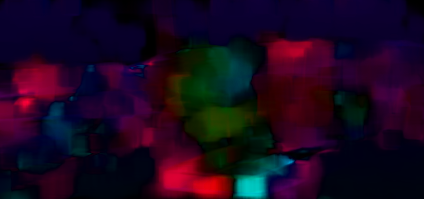

In [6]:
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the images
img1 = cv2.imread('image-1.png')
img2 = cv2.imread('image-2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Resize images to have the same dimensions
# Assuming gray1's dimensions as the target size
gray2 = cv2.resize(gray2, (gray1.shape[1], gray1.shape[0]))

# Calculate the optical flow between the two images
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualize the motion flow
hsv = np.zeros_like(img1)
hsv[..., 1] = 255
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result using cv2_imshow
cv2_imshow(bgr) # Replace cv2.imshow with cv2_imshow
cv2.waitKey(0) # Remove or comment out cv2.waitKey and cv2.destroyAllWindows
cv2.destroyAllWindows()

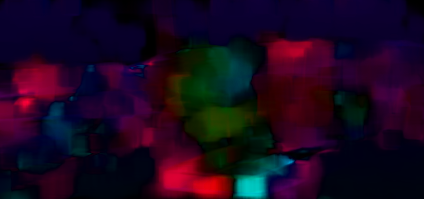

In [3]:
!pip install opencv-python-headless

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the images
img1 = cv2.imread('image-1.png')
img2 = cv2.imread('image-2.png')

# Convert the images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Resize images to have the same dimensions
# Assuming gray1's dimensions as the target size
gray2 = cv2.resize(gray2, (gray1.shape[1], gray1.shape[0]))

# Calculate the optical flow between the two images
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Visualize the motion flow
hsv = np.zeros_like(img1)
hsv[..., 1] = 255
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the result using cv2_imshow
cv2_imshow(bgr) # Replace cv2.imshow with cv2_imshow
#cv2.waitKey(0) # Remove or comment out cv2.waitKey and cv2.destroyAllWindows
#cv2.destroyAllWindows()